In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [19]:
filepath = "/content/drive/MyDrive/United Airlines/overall_complexity.csv"

In [20]:
data = pd.read_csv(filepath)

In [21]:
data.head()

,company_id,flight_number,scheduled_departure_date_local,scheduled_departure_station_code,scheduled_arrival_station_code,departure_delay,arrival_delay,flightfly_delay,buffer,ground_time_utilization,...,num_transfer_bags,total_bags,transfer_ratio,hot_transfer_ratio,bag_complexity_score,total_bags_score,transfer_ratio_score,hot_transfer_ratio_score,overall_flight_complexity,complexity_class
0,OO,4792,2025-08-04,ORD,ROA,7.0,12.0,19.0,8,0.809524,...,20.0,42.0,0.476190,0.380952,0.321977,0.089130,0.476190,0.380952,0.415584,Medium
1,UA,920,2025-08-03,ORD,LHR,22.0,14.0,36.0,90,0.974468,...,37.0,143.0,0.258741,0.111888,0.214986,0.308696,0.258741,0.111888,0.369750,Easy
2,UA,1776,2025-08-10,ORD,PHL,111.0,111.0,0.0,25,0.907895,...,38.0,85.0,0.447059,0.011765,0.193606,0.182609,0.447059,0.011765,0.483951,Medium
3,OO,5790,2025-08-06,ORD,CRW,105.0,98.0,7.0,194,0.170404,...,40.0,54.0,0.740741,0.000000,0.256787,0.115217,0.740741,0.000000,0.386228,Easy
4,UA,1398,2025-08-05,ORD,ATL,0.0,20.0,24.0,24,0.960000,...,51.0,70.0,0.728571,0.000000,0.263571,0.150000,0.728571,0.000000,0.414769,Medium


In [22]:
data.shape

(8099, 49)

/tmp/ipython-input-3881860261.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x='complexity_class', palette='Set2', order=['Easy','Medium','Hard'])


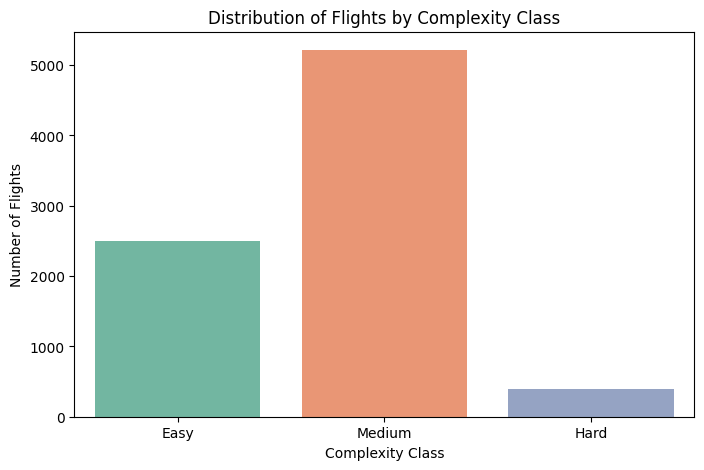

In [28]:

plt.figure(figsize=(8,5))
sns.countplot(data=data, x='complexity_class', palette='Set2', order=['Easy','Medium','Hard'])
plt.title('Distribution of Flights by Complexity Class')
plt.xlabel('Complexity Class')
plt.ylabel('Number of Flights')
plt.show()


In [23]:
data.columns

Index(['company_id', 'flight_number', 'scheduled_departure_date_local',
       'scheduled_departure_station_code', 'scheduled_arrival_station_code',
       'departure_delay', 'arrival_delay', 'flightfly_delay', 'buffer',
       'ground_time_utilization', 'pressure_on_staff', 'ground_time_deviation',
       'normalized_pressure', 'turnaround_risk', 'route', 'dep_score',
       'arr_score', 'flightfly_score', 'buffer_score', 'pressure_score',
       'ground_dev_score', 'norm_pressure_score', 'turnaround_risk_score',
       'delay_complexity_score', 'total_pax', 'total_lap_children',
       'total_children', 'total_basic_economy', 'total_stroller_users',
       'child_ratio', 'basic_economy_ratio', 'stroller_ratio',
       'total_pax_score', 'child_ratio_score', 'basic_economy_ratio_score',
       'stroller_ratio_score', 'passenger_complexity_score',
       'num_hot_transfer_bags', 'num_origin_bags', 'num_transfer_bags',
       'total_bags', 'transfer_ratio', 'hot_transfer_ratio',
       

<Figure size 1200x600 with 0 Axes>

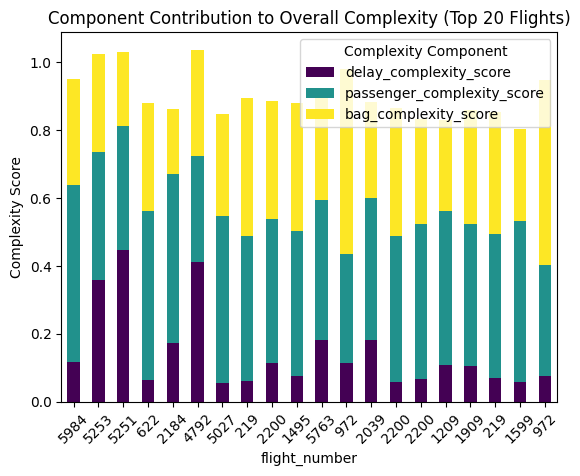

In [27]:
# Select top 20 most complex flights
top_flights = data.sort_values('overall_flight_complexity', ascending=False).head(20)

plt.figure(figsize=(12,6))
top_flights.set_index('flight_number')[['delay_complexity_score', 'passenger_complexity_score', 'bag_complexity_score']].plot(
    kind='bar', stacked=True, colormap='viridis'
)
plt.ylabel('Complexity Score')
plt.title('Component Contribution to Overall Complexity (Top 20 Flights)')
plt.xticks(rotation=45)
plt.legend(title='Complexity Component')
plt.show()


In [25]:
# --- Step 1: Count flights in each complexity class per airline ---
complexity_distribution = (
    data.groupby(['company_id', 'complexity_class'])
    .size()
    .reset_index(name='flight_count')
)

# --- Step 2: Normalize to percentage (use transform instead of apply) ---
complexity_distribution['percentage'] = (
    complexity_distribution.groupby('company_id')['flight_count']
    .transform(lambda x: (x / x.sum()) * 100)
)

print(complexity_distribution)

   company_id complexity_class  flight_count  percentage
0          G7             Easy           486   56.577416
1          G7             Hard             8    0.931315
2          G7           Medium           365   42.491269
3          OO             Easy          1055   49.507274
4          OO             Hard            45    2.111685
5          OO           Medium          1031   48.381042
6          UA             Easy           665   14.771213
7          UA             Hard           334    7.418925
8          UA           Medium          3503   77.809862
9          YX             Easy           288   47.446458
10         YX             Hard             3    0.494234
11         YX           Medium           316   52.059308


         route  overall_flight_complexity
22   ORD → BRU                   0.808773
80   ORD → HNL                   0.787964
123  ORD → OGG                   0.781723
73   ORD → GRU                   0.734899
77   ORD → GUA                   0.705195
79   ORD → HND                   0.694809
122  ORD → NAS                   0.693822
66   ORD → FRA                   0.689719
114  ORD → MSO                   0.673339
104  ORD → MCO                   0.659477


/tmp/ipython-input-682009218.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


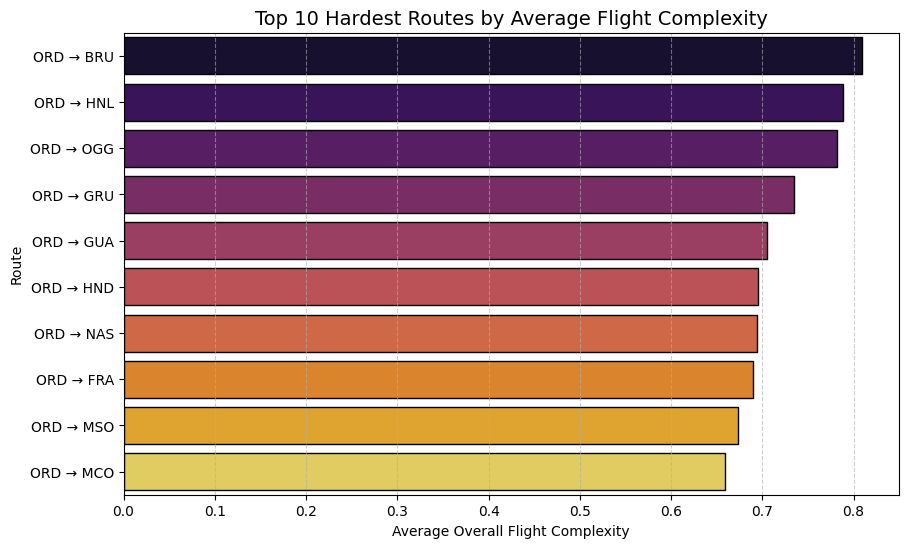

In [32]:

# --- Step 1: Create a 'route' column if not already present ---
data['route'] = data['scheduled_departure_station_code'] + " → " + data['scheduled_arrival_station_code']

# --- Step 2: Group by route and compute average complexity ---
route_complexity = (
    data.groupby('route')['overall_flight_complexity']
    .mean()
    .reset_index()
    .sort_values(by='overall_flight_complexity', ascending=False)
)

# --- Step 3: Get Top 10 hardest routes ---
top_10_routes = route_complexity.head(10)
print(top_10_routes)

# --- Step 4: Visualize ---
plt.figure(figsize=(10,6))
sns.barplot(
    data=top_10_routes,
    x='overall_flight_complexity',
    y='route',
    palette='inferno',
    edgecolor='black'
)
plt.title('Top 10 Hardest Routes by Average Flight Complexity', fontsize=14)
plt.xlabel('Average Overall Flight Complexity')
plt.ylabel('Route')
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.show()


/tmp/ipython-input-2962247953.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=company_complexity, x='company_id', y='total_complexity_score', palette='viridis', edgecolor='black')


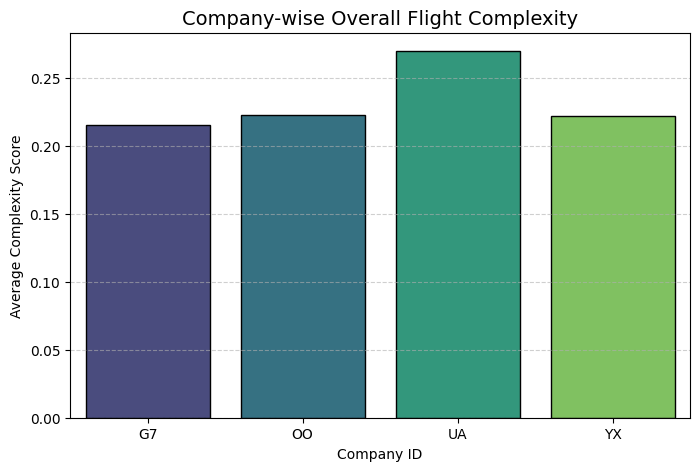

In [29]:
# --- Step 1: Select relevant complexity columns ---
complexity_cols = [
    'delay_complexity_score',
    'passenger_complexity_score',
    'bag_complexity_score',
    'overall_flight_complexity'
]

# --- Step 2: Compute mean of these per company ---
company_complexity = (
    data.groupby('company_id')[complexity_cols]
    .mean()
    .reset_index()
)

# --- Step 3: Add an overall combined score ---
company_complexity['total_complexity_score'] = company_complexity[
    ['delay_complexity_score', 'passenger_complexity_score', 'bag_complexity_score',
     'overall_flight_complexity']
].mean(axis=1)



# --- Step 4: Visualization 1 — Bar Chart for overall complexity ---
plt.figure(figsize=(8, 5))
sns.barplot(data=company_complexity, x='company_id', y='total_complexity_score', palette='viridis', edgecolor='black')
plt.title('Company-wise Overall Flight Complexity', fontsize=14)
plt.xlabel('Company ID')
plt.ylabel('Average Complexity Score')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()


In [30]:
company_complexity

,company_id,delay_complexity_score,passenger_complexity_score,bag_complexity_score,overall_flight_complexity,total_complexity_score
0,G7,0.068950,0.134960,0.270667,0.385319,0.214974
1,OO,0.071170,0.166365,0.241686,0.411095,0.222579
2,UA,0.071194,0.251224,0.231277,0.525023,0.269679
3,YX,0.065076,0.167606,0.244665,0.410644,0.221998


In [33]:
# --- Step 1: Create a 'route' column ---
data['route'] = (
    data['scheduled_departure_station_code'] + " → " + data['scheduled_arrival_station_code']
)

# --- Step 2: Calculate average complexity per route per company ---
company_route_complexity = (
    data.groupby(['company_id', 'route'])['overall_flight_complexity']
    .mean()
    .reset_index()
)

# --- Step 3: Get top 3 hardest routes for each company ---
top_routes_per_company = (
    company_route_complexity.sort_values(['company_id', 'overall_flight_complexity'], ascending=[True, False])
    .groupby('company_id')
    .head(3)
)

print(top_routes_per_company)


    company_id      route  overall_flight_complexity
8           G7  ORD → CMH                   0.560946
23          G7  ORD → ROC                   0.540943
22          G7  ORD → ROA                   0.467132
94          OO  ORD → MTJ                   0.579501
62          OO  ORD → FCA                   0.556328
114         OO  ORD → SYR                   0.552079
135         UA  ORD → BRU                   0.808773
170         UA  ORD → HNL                   0.787964
198         UA  ORD → OGG                   0.781723
248         YX  ORD → BWI                   0.617681
254         YX  ORD → ELP                   0.590023
247         YX  ORD → BUF                   0.549677
